<a href="https://colab.research.google.com/github/ssatendra790/Machine-Learning-Techniques/blob/main/Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
import requests
gcloud_token = !gcloud auth print-access-token
gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
print(gcloud_tokeninfo['email'])

ssatendra790@gmail.com


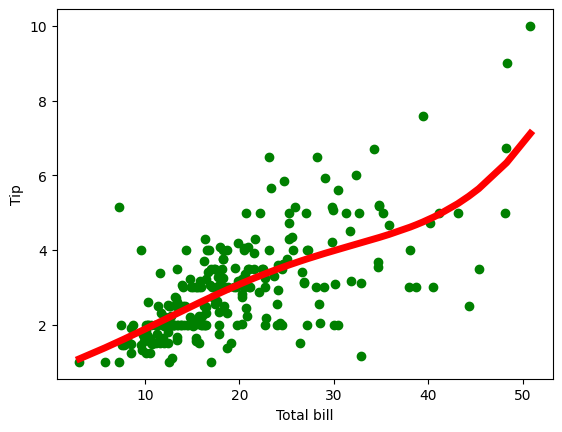

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
def kernel (point, xmat, k):
  m,n= np. shape(xmat)
  weights = np.mat(np. eye ((m)))
  for j in range(m):
      diff =point- X[j]
      weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
  return weights
def localweight (point, xmat, ymat,k):
  wei =kernel (point, xmat,k)
  W = (X.T* (wei*X)). I* (X.T* (wei*ymat.T))
  return W
def localweightRegression(xmat, ymat,k):
  m,n= np. shape(xmat)
  ypred =np.zeros(m)
  for i in range(m):
      ypred[i] = xmat[i]*localweight (xmat[i], xmat,ymat,k)
  return ypred
def graphPlot(x,ypred):
  sortindex = x[:,1].argsort (0) #argsort index of the smallest
  xsort= X[sortindex][:,0]
  fig =plt.figure()
  ax = fig.add_subplot (1,1,1)
  ax.scatter (bill, tip, color='green')
  ax.plot(xsort[:,1],ypred [sortindex], color = 'red', linewidth=5)
  plt.xlabel('Total bill')
  plt.ylabel('Tip')
  plt.show();
data = pd.read_csv("tips.csv")
bill = np.array(data.total_bill) # We use only Bill amount and Tips data
tip = np.array(data.tip)
mbill = np.mat (bill) # .mat will convert nd array is converted in 2D array
mtip = np.mat(tip)
m =np.shape (mbill) [1]
one =np.mat (np.ones(m))
X = np.hstack ((one.T,mbill.T)) # 244 rows, 2 cols
ypred = localweightRegression(X,mtip,8) # increase k to get smooth curves
graphPlot(X,ypred)